# Clasificación del sentimiento en Tweets de Donald Trump

## Análisis descriptivo de los datos

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import import_ipynb
from sklearn.externals import joblib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
cols = ['source','text','created_at','retweet_count','favorite_count','is_retweet','id_str']

In [3]:
df_Trump_Initial = pd.read_csv("./Dataset_TRUMP_Stock.csv",header=0,delimiter=';', encoding='latin-1')
#df_Trump_Initial = pd.read_csv("./DataSheet_..trumptwitterarchive_com_archive.csv",header=0,delimiter=';', encoding='latin-1')

In [4]:
df_Trump_Initial.head()

source                                               text  \
0  Twitter for iPhone  Great, Just Out! 51% Approval Rating in Rasmus...   
1  Twitter for iPhone  Do you notice that any time Fake News Suppress...   
2  Twitter for iPhone  Just In: Chinese State Media and Leaders of CH...   
3  Twitter for iPhone  Joe Biden has said he would lock down the Coun...   
4  Twitter for iPhone                          Big Stock Market Numbers!   

            created_at retweet_count favorite_count is_retweet  \
0  09-14-2020 14:21:47         29828         140648      false   
1  09-03-2020 15:21:41         22801         104433      false   
2  08-26-2020 15:05:08         53011         211703      false   
3  08-24-2020 22:49:50         47596         237358      false   
4  08-11-2020 12:34:14         31242         212782      false   

                id_str Unnamed: 7 Unnamed: 8  Unnamed: 9  
0  1305512070683619328        NaN        NaN         NaN  
1  1301540878381703168        NaN        NaN         NaN  
2  1298637609871212545        NaN        NaN         NaN  
3  1298029780437270530        NaN        NaN         NaN  
4  1293163818282094594        NaN        NaN         NaN

In [5]:
df_Trump_Initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source          1276 non-null   object 
 1   text            1276 non-null   object 
 2   created_at      1275 non-null   object 
 3   retweet_count   1274 non-null   object 
 4   favorite_count  1274 non-null   object 
 5   is_retweet      1269 non-null   object 
 6   id_str          1274 non-null   object 
 7   Unnamed: 7      177 non-null    object 
 8   Unnamed: 8      31 non-null     object 
 9   Unnamed: 9      5 non-null      float64
dtypes: float64(1), object(9)
memory usage: 99.8+ KB


In [6]:
del(df_Trump_Initial['Unnamed: 7'])
del(df_Trump_Initial['Unnamed: 8'])
del(df_Trump_Initial['Unnamed: 9'])
df_Trump_Initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          1276 non-null   object
 1   text            1276 non-null   object
 2   created_at      1275 non-null   object
 3   retweet_count   1274 non-null   object
 4   favorite_count  1274 non-null   object
 5   is_retweet      1269 non-null   object
 6   id_str          1274 non-null   object
dtypes: object(7)
memory usage: 69.9+ KB


In [7]:
df_Trump_Initial_Date=df_Trump_Initial.created_at
df_Trump_Initial_Date

0       09-14-2020 14:21:47
1       09-03-2020 15:21:41
2       08-26-2020 15:05:08
3       08-24-2020 22:49:50
4       08-11-2020 12:34:14
               ...         
1271    03-12-2020 13:28:05
1272    03-09-2020 10:36:12
1273    03-02-2020 12:28:53
1274    03-02-2020 12:09:47
1275    02-26-2020 07:24:59
Name: created_at, Length: 1276, dtype: object

In [8]:
df_Trump_ToClean=pd.DataFrame({'mensaje': df_Trump_Initial.text, 'sentimiento': ""})
df_Trump_ToClean

mensaje sentimiento
0     Great, Just Out! 51% Approval Rating in Rasmus...            
1     Do you notice that any time Fake News Suppress...            
2     Just In: Chinese State Media and Leaders of CH...            
3     Joe Biden has said he would lock down the Coun...            
4                             Big Stock Market Numbers!            
...                                                 ...         ...
1271  RT @ScottGottliebMD: From @FaceTheNation on #C...            
1272  RT @DrPaulGosar: Also. There seems to be a Lef...            
1273  RT @WHOWPRO: This is how you can reduce your r...            
1274  RT @HealthyFla: Florida has 2 presumptive posi...            
1275  RT @CDCgov: There is currently no reported com...            

[1276 rows x 2 columns]

In [9]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import re as patternToDelete
from bs4 import BeautifulSoup

In [10]:
import unicodedata
from unidecode import unidecode

def deEmojify(inputString):
    returnString = ""
    for character in inputString:
        try:
            character.encode("ascii")
            returnString += character
        except UnicodeEncodeError:
            returnString += ''
    return returnString

In [11]:
patternToDelete1 = r'@[A-Za-z0-9_]+'
patternToDelete2 = r'https?://[^ ]+'
patternToDelete3 = r'rt? +'
patron = r'|'.join((patternToDelete1, patternToDelete2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
patronNegacion = patternToDelete.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
i=0
def limpieza_tweets(mensaje):
   
    #patternToDelete.sub('https?://[A-Za-z0-9./]+','',mensaje)
    out = BeautifulSoup(patternToDelete.sub('https?://[A-Za-z0-9./]+','',mensaje), 'lxml')
    out_souped = out.get_text()
    
    try:
        bom_borrado = out_souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_borrado = out_souped
        
    emoji_borrado = deEmojify(bom_borrado)
    mensajeAux = patternToDelete.sub(patron, '', emoji_borrado)  
    mensajeAux = patternToDelete.sub(www_pat, '', mensajeAux)
    lmensajeAux_lower_case = mensajeAux.lower()
    neg_handled = patronNegacion.sub(lambda x: negations_dic[x.group()], lmensajeAux_lower_case)
    mensajeSoloLetras = patternToDelete.sub("[^a-zA-Z]", " ", neg_handled)
    mensajeSoloLetras2 = patternToDelete.sub(patternToDelete3, " ", mensajeSoloLetras)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(mensajeSoloLetras2) if len(x) > 1]
    return (" ".join(words)).strip()


In [12]:
%%time
print ("Limpiando y parseando todos los tweets...\n")
print(df_Trump_ToClean)
tweetsLimpios = []
i=0
while i < len(df_Trump_ToClean):
    if( (i+1)%1000 == 0 ):
        print ("Tweets número %d de %d han sido procesados" % ( i+1, len(df_Trump_ToClean) ))                                                                    
    tweetsLimpios.append(limpieza_tweets(df_Trump_ToClean['mensaje'][i]))
    
    i += 1

Limpiando y parseando todos los tweets...

                                                mensaje sentimiento
0     Great, Just Out! 51% Approval Rating in Rasmus...            
1     Do you notice that any time Fake News Suppress...            
2     Just In: Chinese State Media and Leaders of CH...            
3     Joe Biden has said he would lock down the Coun...            
4                             Big Stock Market Numbers!            
...                                                 ...         ...
1271  RT @ScottGottliebMD: From @FaceTheNation on #C...            
1272  RT @DrPaulGosar: Also. There seems to be a Lef...            
1273  RT @WHOWPRO: This is how you can reduce your r...            
1274  RT @HealthyFla: Florida has 2 presumptive posi...            
1275  RT @CDCgov: There is currently no reported com...            

[1276 rows x 2 columns]
Tweets número 1000 de 1276 han sido procesados
Wall time: 364 ms


In [13]:
tweetsLimpios

['great just out approval rating in rasmussen poll in republican party stock market up big today will eve be given credit fo the markets and economy next yea will be big',
 'do you notice that any time fake news suppression polls are put out like the stock market goes down we are going to win',
 'just in chinese state media and leaders of china want biden to win the election if this happened which it wont china would own ou country and ou record setting stock markets would literally crash',
 'joe biden has said he would lock down the country again thats crazy were having record job growth and booming stock market but joe would end it all and close it all down ridiculous',
 'big stock market numbers',
 'sleepy joe biden just agreed with the radical left democrats to raise taxes by three trillion dollars everyone will pay will kill you stocks ks and the economy big crash maga',
 'record high nasdaq it would all come crashing down including you jobs stocks and ks if sleepy joe eve became 

Procedo a la carga del modelo que mejores resultados me ha suministrado

In [14]:
modelo_t_tfidf=joblib.load('.\Modelos Entrenados\modelo_entrenado_t_tfidf.pkl')

In [15]:
modelo=modelo_t_tfidf
y_pred_Trump = modelo.predict(tweetsLimpios)

In [16]:
y_pred_Trump

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [17]:
df_Trump_Classified=pd.DataFrame({'mensaje': tweetsLimpios, 'sentimiento': y_pred_Trump})



In [18]:
df_Trump_Classified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mensaje      1276 non-null   object
 1   sentimiento  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


Añado la columna fecha y reorganizo el dataframe.

In [19]:
df_Trump_Classified["fecha"]=df_Trump_Initial_Date
cols = df_Trump_Classified.columns.tolist()
cols = ['mensaje','fecha','sentimiento']
df_Trump_Classified= df_Trump_Classified[cols]

In [20]:
df_Trump_Classified

mensaje                fecha  \
0     great just out approval rating in rasmussen po...  09-14-2020 14:21:47   
1     do you notice that any time fake news suppress...  09-03-2020 15:21:41   
2     just in chinese state media and leaders of chi...  08-26-2020 15:05:08   
3     joe biden has said he would lock down the coun...  08-24-2020 22:49:50   
4                              big stock market numbers  08-11-2020 12:34:14   
...                                                 ...                  ...   
1271  from on covid the next few months will be hard...  03-12-2020 13:28:05   
1272  also there seems to be leftist trope that the ...  03-09-2020 10:36:12   
1273  this is how you can reduce you risk of new cor...  03-02-2020 12:28:53   
1274  florida has presumptive positive covid cases o...  03-02-2020 12:09:47   
1275  there is currently no reported community sprea...  02-26-2020 07:24:59   

      sentimiento  
0               1  
1               1  
2               0  
3               0  
4               0  
...           ...  
1271            0  
1272            1  
1273            1  
1274            1  
1275            1  

[1276 rows x 3 columns]

In [21]:
df_Trump_Classified = df_Trump_Classified.drop(df_Trump_Classified[df_Trump_Classified['mensaje']==''].index)

In [22]:
df_Trump_Classified.to_csv("trumpAUX.csv")

In [23]:
df_Trump_Classified = pd.read_csv("trumpAUX.csv",index_col=0)

## Word Cloud

In [24]:

neg_tweets = df_Trump_Classified[df_Trump_Classified.sentimiento == 0]
neg_string = []
for t in neg_tweets.mensaje:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

(-0.5, 2399.5, 1422.5, -0.5)

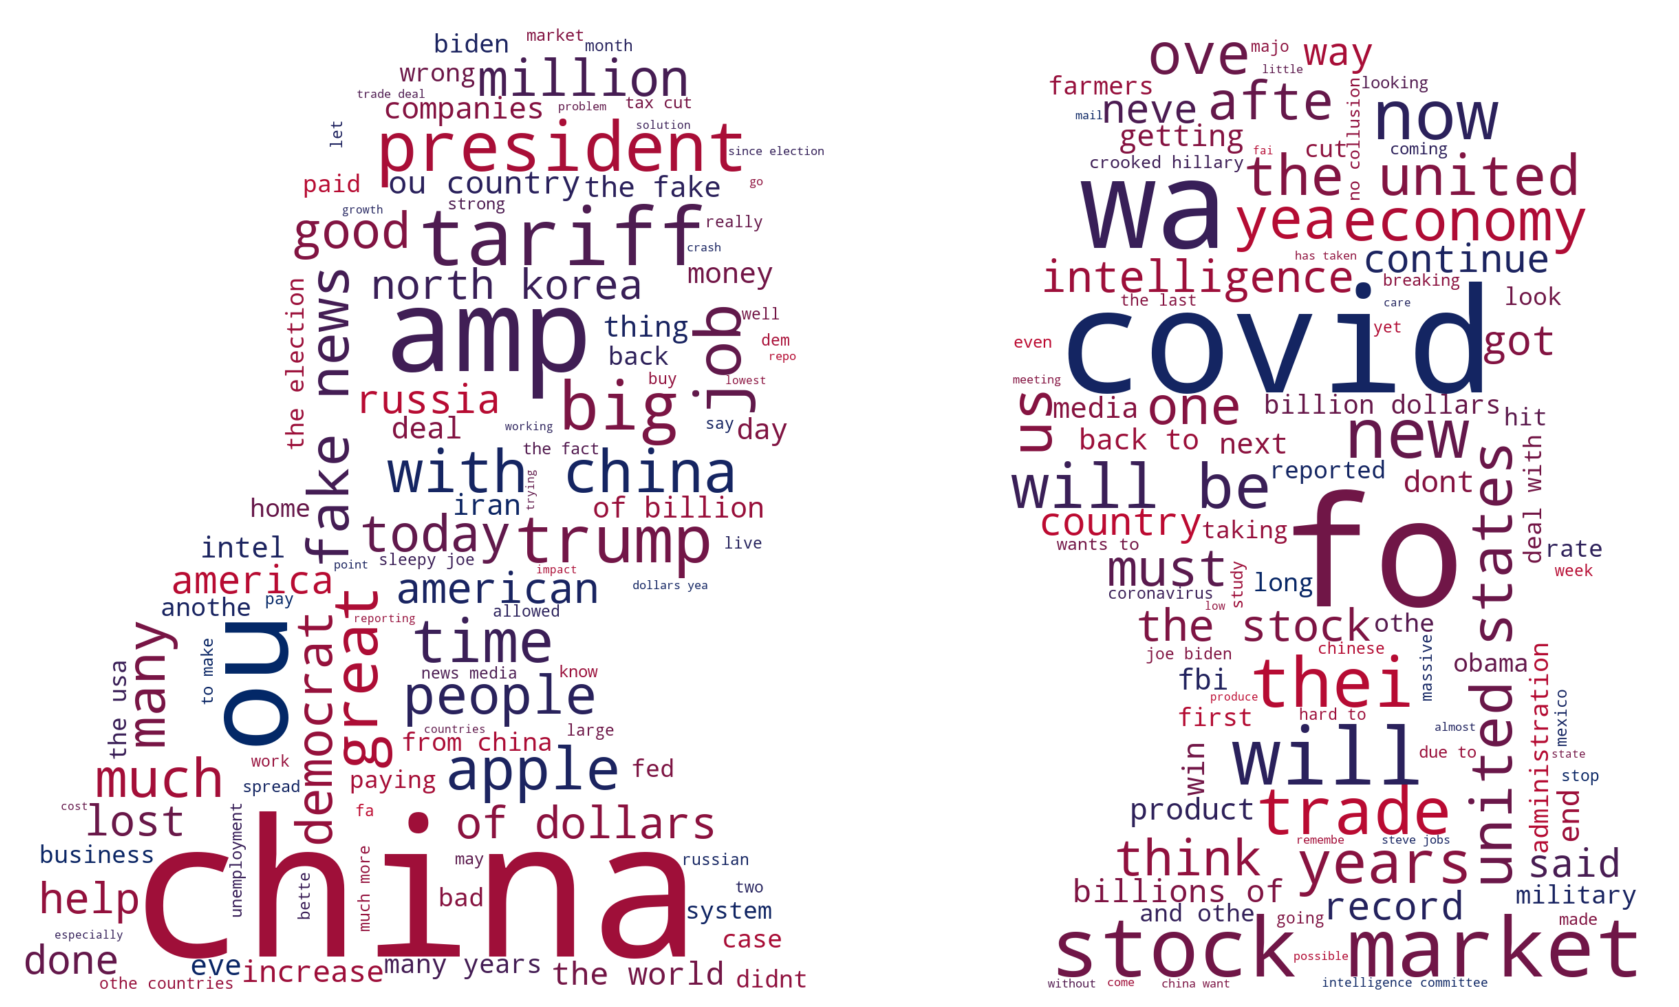

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

mask = np.array(Image.open("trump.jpg"))
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Create WordCloud Object
wc = WordCloud(background_color="white",
                 width=853, height=506, mask=mask, colormap=cmap)
wc.generate(neg_string)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [26]:
pos_tweets = df_Trump_Classified[df_Trump_Classified.sentimiento == 1]
pos_string = []
for t in pos_tweets.mensaje:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

(-0.5, 2399.5, 1422.5, -0.5)

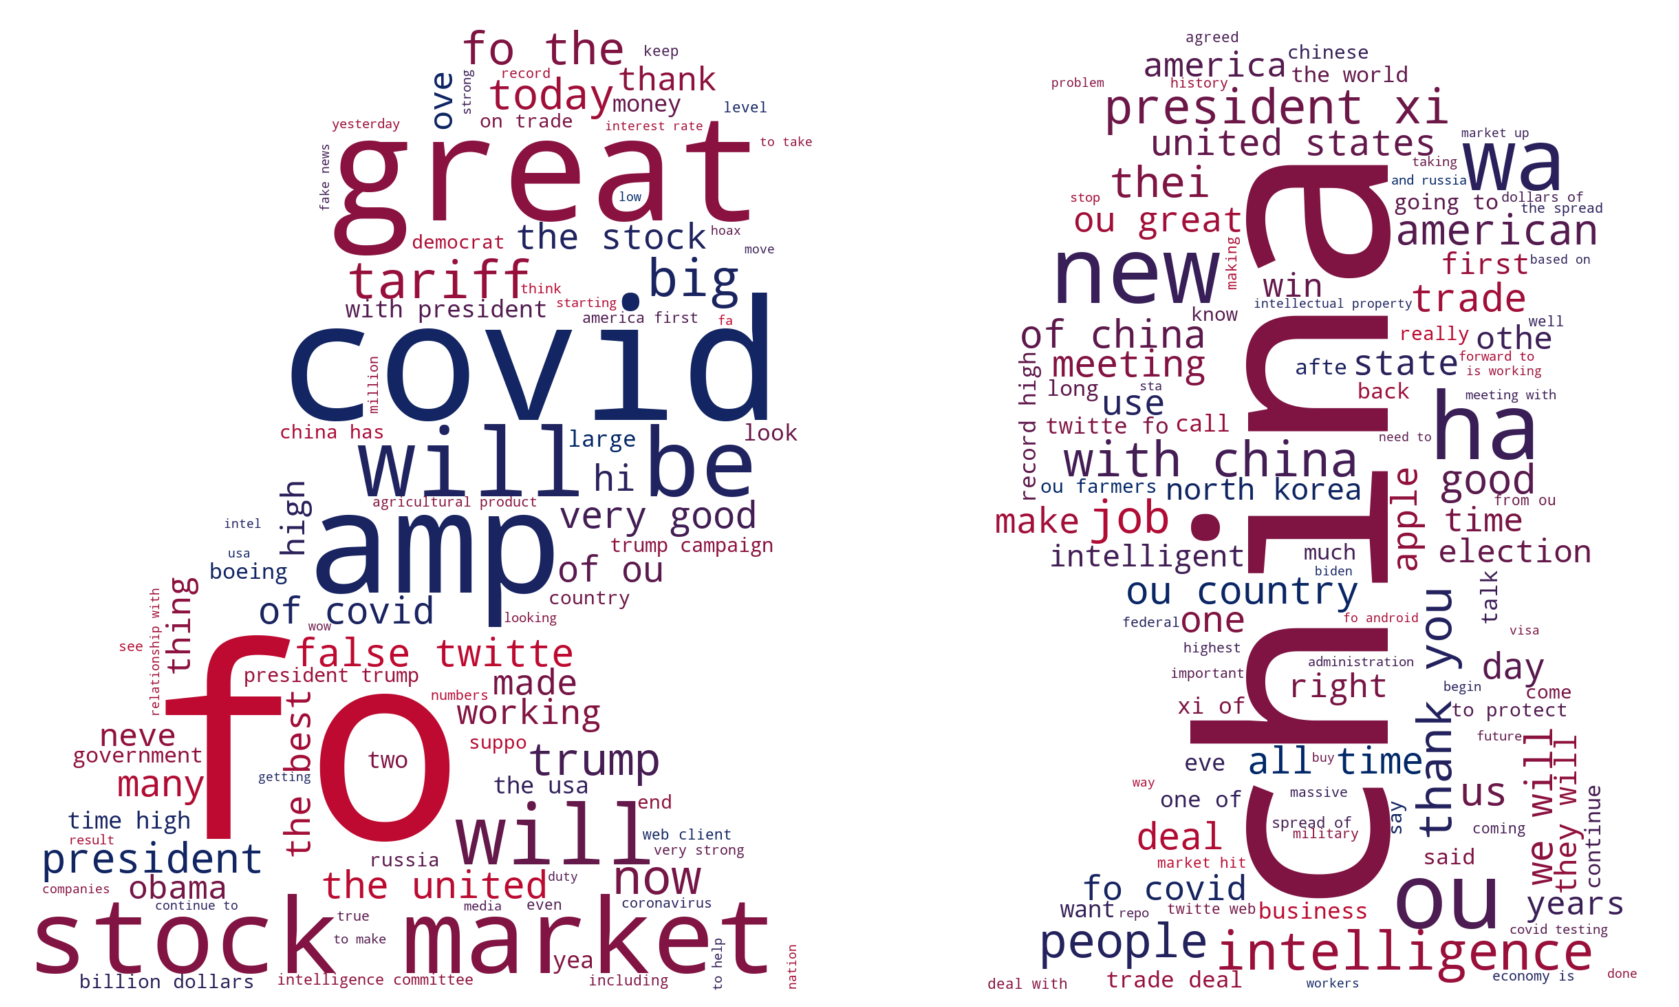

In [27]:
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Create WordCloud Object
wc = WordCloud(background_color="white",
                 width=853, height=506, mask=mask, colormap=cmap)
wc.generate(pos_string)


plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

## Visualización de datos

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
#Convert a collection of text documents to a matrix of token counts
cvec = CountVectorizer(stop_words='english')
cvec.fit(df_Trump_Classified.mensaje)

CountVectorizer(stop_words='english')

In [29]:
len(cvec.get_feature_names())

3712

CountVectorizer ha extraido 16457 parabras del corpus

In [30]:
cvec.get_feature_names()

['abbottabad',
 'abc',
 'able',
 'abnormally',
 'abound',
 'absentee',
 'absolutely',
 'abuse',
 'abused',
 'abusive',
 'accept',
 'acceptable',
 'accepting',
 'access',
 'accomplish',
 'accomplished',
 'accomplishments',
 'accord',
 'according',
 'account',
 'accusations',
 'accuse',
 'accused',
 'accuses',
 'achieved',
 'achieving',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'actuality',
 'actually',
 'ad',
 'adam',
 'adamschiff',
 'add',
 'added',
 'addictive',
 'adding',
 'addit',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressing',
 'adds',
 'adept',
 'adjusted',
 'admin',
 'administration',
 'administrations',
 'admiral',
 'admission',
 'admit',
 'admits',
 'adopting',
 'ads',
 'adult',
 'adults',
 'advanced',
 'advantage',
 'advantages',
 'advice',
 'adviso',
 'advisory',
 'affected',
 'affects',
 'affiliate',
 'affirming',
 'afraid',
 'aft',
 'afte',
 'afternoon',
 'ag',
 'age',
 'agencies',
 'agenda',
 'agent',
 'aggres

In [31]:
neg_doc_matrix = cvec.transform(df_Trump_Classified[df_Trump_Classified.sentimiento == 0].mensaje)
pos_doc_matrix = cvec.transform(df_Trump_Classified[df_Trump_Classified.sentimiento == 1].mensaje)


In [32]:
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

In [33]:
#squeeze function is used when we want to remove single-dimensional entries from the shape of an array.
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
type(term_freq_df)

pandas.core.frame.DataFrame

In [34]:
names = term_freq_df.columns.tolist()
names

[0, 1]

In [35]:
names = term_freq_df.columns.tolist()
names[names.index(0)] = 'negativo'
names[names.index(1)] = 'positivo'
term_freq_df.columns = names

In [36]:
term_freq_df["Total"]=term_freq_df.sum(axis=1)
term_freq_df

negativo  positivo  Total
abbottabad         0         1      1
abc                2         1      3
able               2         4      6
abnormally         0         1      1
abound             0         1      1
...              ...       ...    ...
youve              2         0      2
yrs                0         2      2
zero               5         3      8
zimmerman          1         0      1
zte                2         1      3

[3712 rows x 3 columns]

In [37]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

In [38]:
term_freq_df.sort_values(by='Total', ascending=False)

negativo  positivo  Total
china           230       227    457
fo              122       265    387
covid           113       201    314
ou               78       182    260
amp              67       106    173
...             ...       ...    ...
intensive         1         0      1
intense           0         1      1
intend            0         1      1
intellig          0         1      1
largely           0         1      1

[3712 rows x 3 columns]

Text(0.5, 1.0, 'Top 500 tokens in tweets')

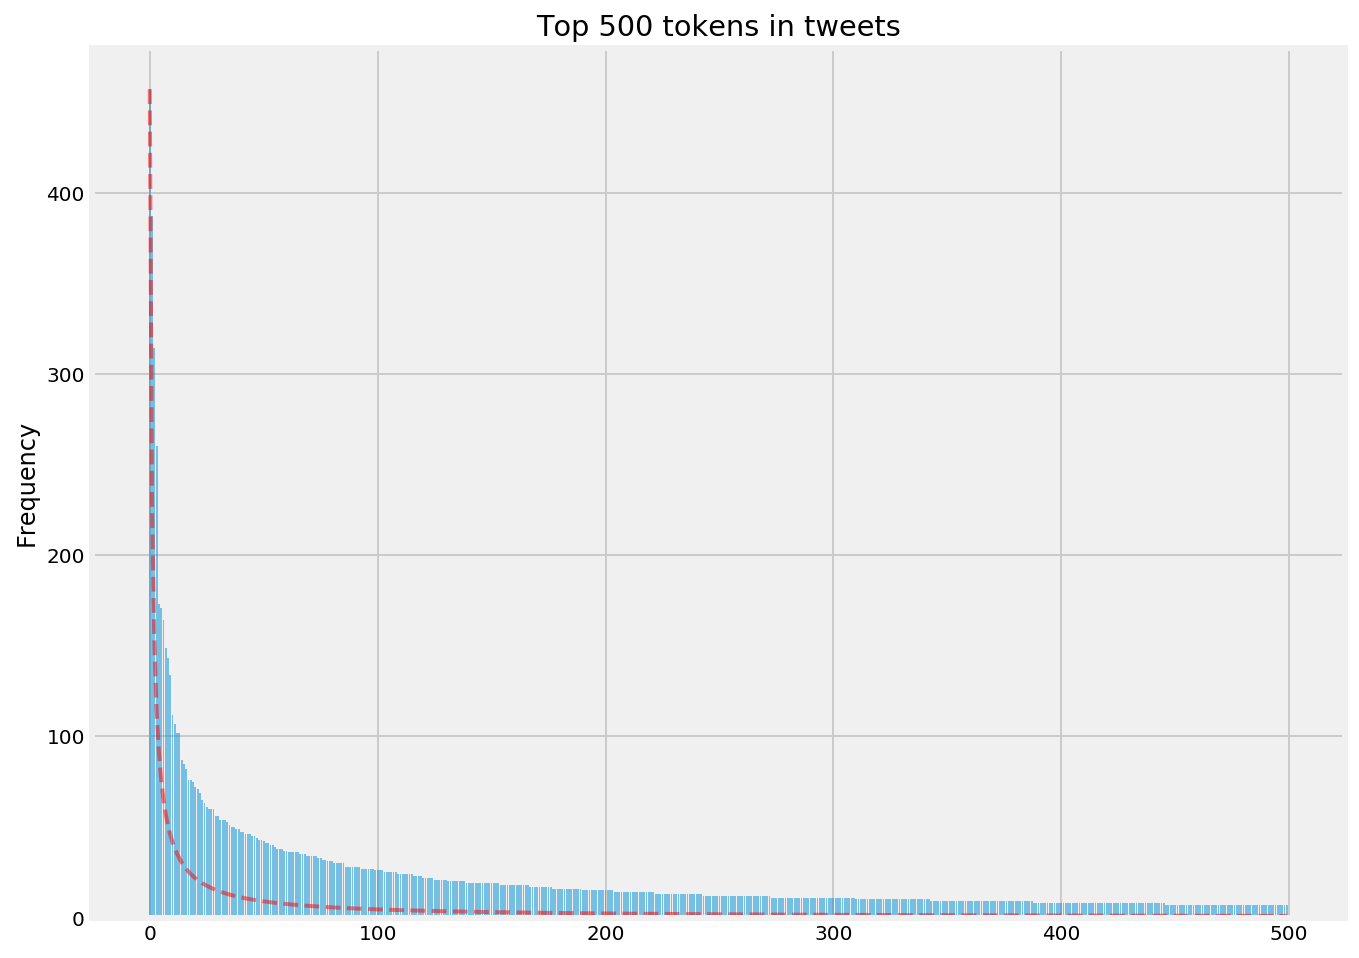

In [39]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='Total', ascending=False)['Total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='Total', ascending=False)['Total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

Par la visualización de los tokens en los tweets de Trump voy a proceder a eliminar las stopword ya que me restan significado al análisis que quiero mostrar

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_Trump_Classified.mensaje)

CountVectorizer(max_features=10000, stop_words='english')

In [41]:
document_matrix = cvec.transform(df_Trump_Classified.mensaje)

In [42]:
%%time
neg_batches = np.linspace(0,len(df_Trump_Classified)/2,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

70 entries' term freuquency calculated
141 entries' term freuquency calculated
212 entries' term freuquency calculated
283 entries' term freuquency calculated
354 entries' term freuquency calculated
425 entries' term freuquency calculated
496 entries' term freuquency calculated
567 entries' term freuquency calculated
638 entries' term freuquency calculated
Wall time: 8.98 ms


In [43]:
%%time
pos_batches = np.linspace(len(df_Trump_Classified)/2,len(df_Trump_Classified),10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

708 entries' term freuquency calculated
779 entries' term freuquency calculated
850 entries' term freuquency calculated
921 entries' term freuquency calculated
992 entries' term freuquency calculated
1063 entries' term freuquency calculated
1134 entries' term freuquency calculated
1205 entries' term freuquency calculated
1276 entries' term freuquency calculated
Wall time: 11.9 ms


In [44]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negativo', 'positivo']
term_freq_df2['Total'] = term_freq_df2['negativo'] + term_freq_df['positivo']
term_freq_df2.sort_values(by='Total', ascending=False).iloc[:10]

negativo  positivo  Total
china           430        27    657
fo              197       190    462
ou              156       104    338
stock           161         3    261
great           116        55    258
market          143         0    227
president       100        49    209
amp              98        75    204
covid             0       314    201
trade            96        11    159

Las 40 palabras más negativas

Text(0.5, 1.0, 'Los 40 tokens más negativos en tweets')

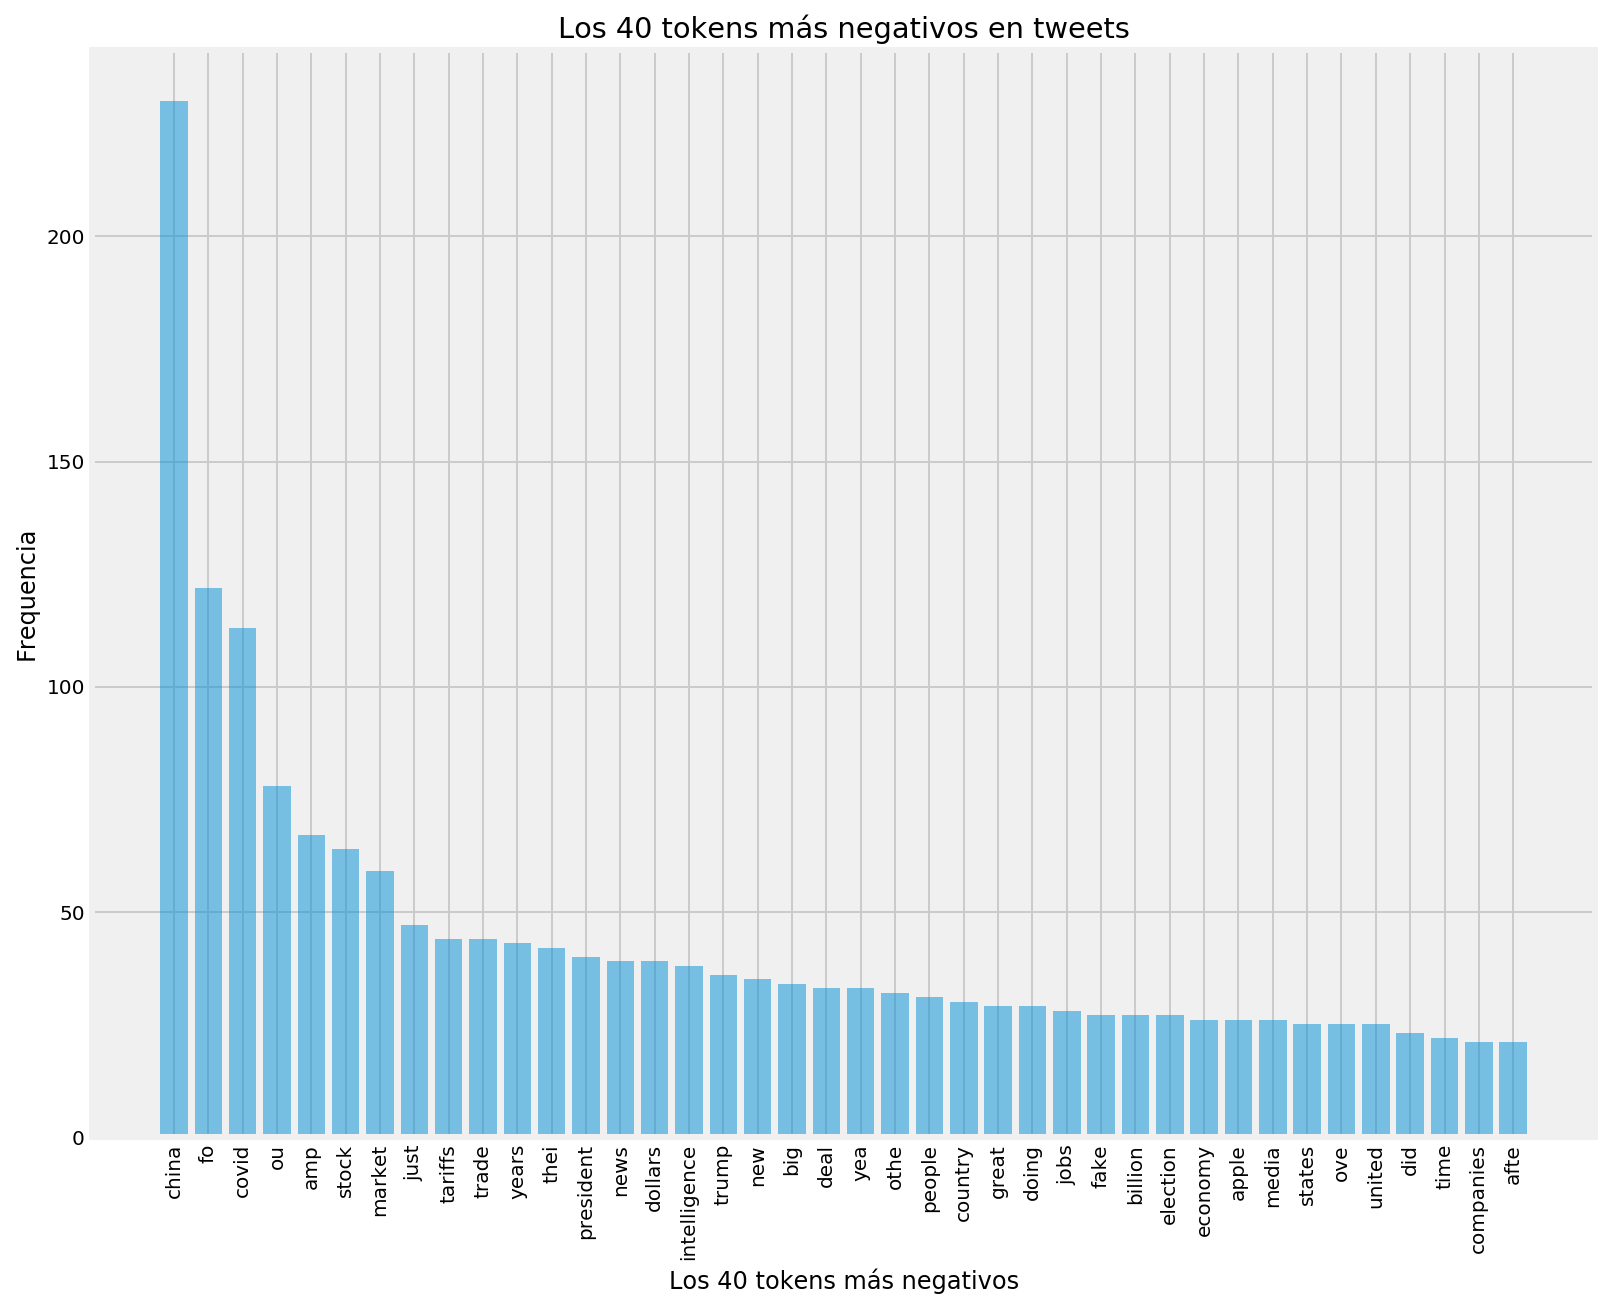

In [45]:
y_pos = np.arange(40)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negativo', ascending=False)['negativo'][:40], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negativo', ascending=False)['negativo'][:40].index,rotation='vertical')
plt.ylabel('Frequencia')
plt.xlabel('Los 40 tokens más negativos')
plt.title('Los 40 tokens más negativos en tweets')

Text(0.5, 1.0, 'Los 40 tokens más positivos en tweets')

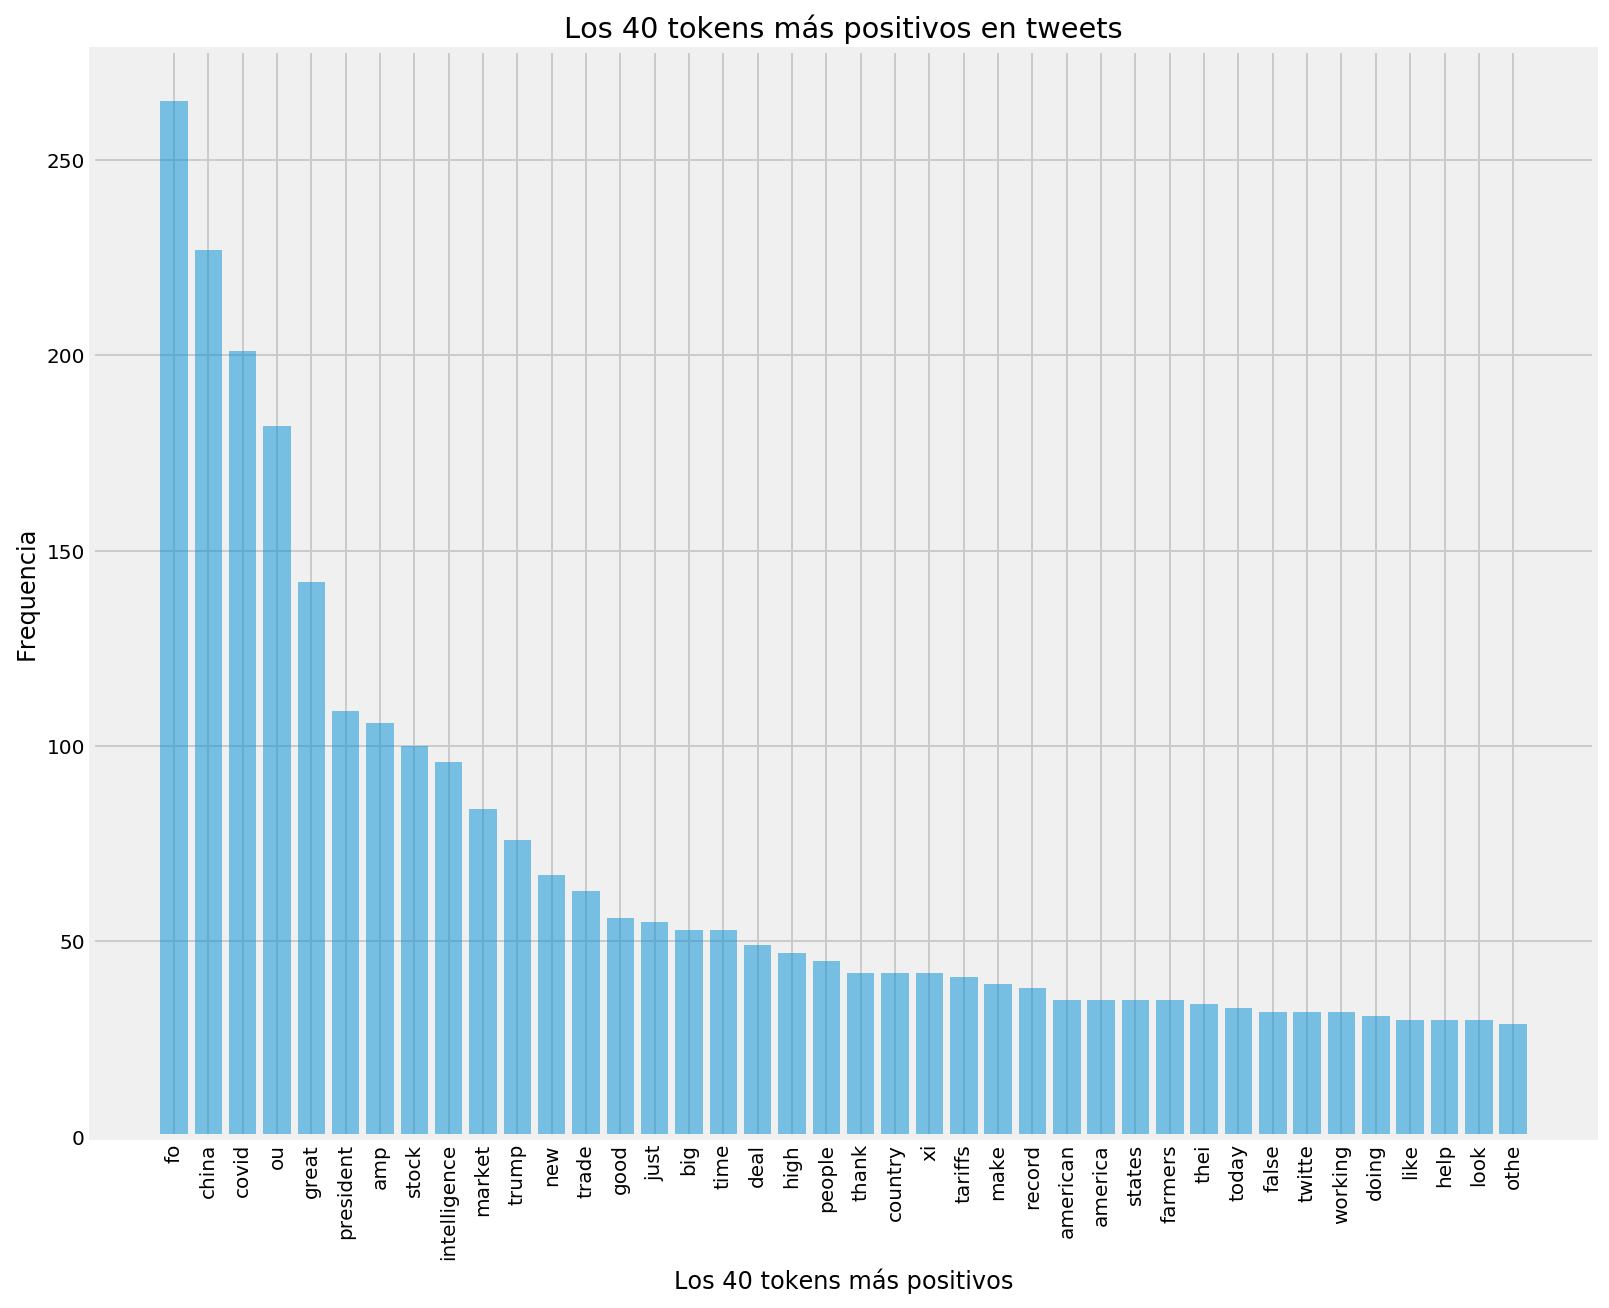

In [46]:
y_pos = np.arange(40)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positivo', ascending=False)['positivo'][:40], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positivo', ascending=False)['positivo'][:40].index,rotation='vertical')
plt.ylabel('Frequencia')
plt.xlabel('Los 40 tokens más positivos')
plt.title('Los 40 tokens más positivos en tweets')

In [47]:
df_Trump_Classified.to_csv('Trump_SA_For_LSTM.csv',encoding='utf-8')

In [48]:
df_Trump_Classified

mensaje                fecha  \
0     great just out approval rating in rasmussen po...  09-14-2020 14:21:47   
1     do you notice that any time fake news suppress...  09-03-2020 15:21:41   
2     just in chinese state media and leaders of chi...  08-26-2020 15:05:08   
3     joe biden has said he would lock down the coun...  08-24-2020 22:49:50   
4                              big stock market numbers  08-11-2020 12:34:14   
...                                                 ...                  ...   
1271  from on covid the next few months will be hard...  03-12-2020 13:28:05   
1272  also there seems to be leftist trope that the ...  03-09-2020 10:36:12   
1273  this is how you can reduce you risk of new cor...  03-02-2020 12:28:53   
1274  florida has presumptive positive covid cases o...  03-02-2020 12:09:47   
1275  there is currently no reported community sprea...  02-26-2020 07:24:59   

      sentimiento  
0               1  
1               1  
2               0  
3               0  
4               0  
...           ...  
1271            0  
1272            1  
1273            1  
1274            1  
1275            1  

[1276 rows x 3 columns]

In [49]:
df = df_Trump_Classified['sentimiento'].value_counts()

In [50]:
print("Porcentaje de tweets positivos: {}%".format(df[1]*100/len(df_Trump_Classified)))
print("Porcentaje de tweets negativos: {}%".format(df[0]*100/len(df_Trump_Classified)))

Porcentaje de tweets positivos: 62.38244514106583%
Porcentaje de tweets negativos: 37.61755485893417%


In [51]:
import plotly.graph_objects as go
labels=["Porcentaje de tweets positivos", "Porcentaje de tweets negativos"]
values = [df[1]*100/len(df_Trump_Classified), df[0]*100/len(df_Trump_Classified)]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()